<a href="https://colab.research.google.com/github/arnavxyz/scaler_probability_statistics/blob/main/Lec_4_T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# IQ Pill example


In [ ]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [ ]:
np.mean(iq_scores)

103.5

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
# deafult value of alternative is "two_sided"
# "greater" for right tailed test
# "smaller" for left tailed
t_stat,p_val = ttest_1samp(iq_scores,100,alternative="greater")

In [ ]:
print(p_val)

0.08774972467925055


as the p_value is greater than 0.05,we fail to reject H0, we conclude that pill has no effect

# Schools IQ comparison

In [ ]:
!gdown 1t9LJ6on72_sjHDSQ5I1YN_x6_HR3_roL

Downloading...
From: https://drive.google.com/uc?id=1t9LJ6on72_sjHDSQ5I1YN_x6_HR3_roL
To: /content/iq_two_schools.csv
100% 639/639 [00:00<00:00, 1.95MB/s]


In [ ]:
df_iq = pd.read_csv('/content/iq_two_schools.csv')
df_iq.sample(5)

,School,iq
14,school_1,99
47,school_2,133
21,school_1,112
29,school_2,92
4,school_1,115


In [ ]:
iq_1 = df_iq[df_iq['School'] == 'school_1']['iq']
iq_2 = df_iq[df_iq['School'] == 'school_2']['iq']

In [ ]:
iq_1

0      91
1      95
2     110
3     112
4     115
5      94
6      82
7      84
8      85
9      89
10     91
11     91
12     92
13     94
14     99
15     99
16    105
17    109
18    109
19    109
20    110
21    112
22    112
23    113
24    114
25    114
Name: iq, dtype: int64

In [ ]:
np.mean(iq_1)

101.15384615384616

In [ ]:
iq_2

26    112
27    115
28     95
29     92
30     91
31     95
32     91
33     99
34    111
35    115
36    108
37    109
38    109
39    114
40    115
41    116
42    117
43    117
44    128
45    129
46    130
47    133
48     95
49     90
Name: iq, dtype: int64

In [ ]:
np.mean(iq_2)

109.41666666666667

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#two_sided
t_stat,p_val = ttest_ind(iq_1,iq_2)
print(p_val)

0.02004552710936217


as p_value is less than 0.05, we reject the null hypothesis, iq levels of the two schools is not the same

In [ ]:
#left sided
#H1 : mu1<mu2
t_stat,p_val = ttest_ind(iq_1,iq_2,alternative="less")
print(p_val)

0.010022763554681085


as p_value is less than 0.05, we reject the null hypothesis, iq level of school 1 is less than iq levels of school 2



In [ ]:
#right sided
#H1 : mu1>mu2
t_stat,p_val = ttest_ind(iq_1,iq_2,alternative="greater")
print(p_val)

0.9899772364453189


# Cricket Example

In [ ]:
!gdown 1A4rKIs7_ffFSwaBcUoVeCV928J4XIbJj

Downloading...
From: https://drive.google.com/uc?id=1A4rKIs7_ffFSwaBcUoVeCV928J4XIbJj
To: /content/Sachin_ODI.csv
100% 26.4k/26.4k [00:00<00:00, 34.4MB/s]


In [ ]:
df_sachin = pd.read_csv('/content/Sachin_ODI.csv')
df_sachin.head(3)

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False


In [ ]:
df_sachin["runs"].mean()

43.24166666666667

In [ ]:
df_sachin.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
inn1_scores = df_sachin[df_sachin["Inns"]==1]["runs"]
inn2_scores = df_sachin[df_sachin["Inns"]==2]["runs"]

In [ ]:
inn1_scores.head()

0      13
7      30
15    137
16      3
17     31
Name: runs, dtype: int64

In [ ]:
# H0 : mu1 = mu2
# H1 : mu1 <> mu2
t_stat,p_val = ttest_ind(inn1_scores,inn2_scores)
print(p_val)

0.14483724194759962


as p_val is greater than 0.05, we fail to reject H0

In [ ]:
# H0 : mu1 = mu2
# H1 : mu1 > mu2 (right tailed test)
t_stat,p_val = ttest_ind(inn1_scores,inn2_scores,alternative="greater")
print(p_val)

0.07241862097379981


as p_val is greater than 0.05, we fail to reject H0

In [ ]:
# comparing batting averages between matches lost and matches won
df_sachin.groupby("Won")["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [ ]:
df_won = df_sachin[df_sachin["Won"]==True]["runs"]
df_lost = df_sachin[df_sachin["Won"]==False]["runs"]

In [ ]:
#H0: mu1=mu2
#H1: mu1>mu2 (right tailed test)
t_stat,p_val = ttest_ind(df_won,df_lost,alternative="greater")
print(p_val)

0.00016353077486826558


p_val < 0.05, reject H0, batting avg is higher when India won

# Drug Recovery Time Example

In [ ]:
!gdown 15HOYvPFYWF_dAMBMD2EvGG9gyYdAssmm

Downloading...
From: https://drive.google.com/uc?id=15HOYvPFYWF_dAMBMD2EvGG9gyYdAssmm
To: /content/drug_1_recovery.csv
100% 1.10k/1.10k [00:00<00:00, 3.99MB/s]


In [ ]:
d1 = pd.read_csv('/content/drug_1_recovery.csv')
d1.head()

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716


In [ ]:
!gdown 1IdyZiAAMPKt3bKR2Hx2pIl2cPZG7NZD1

Downloading...
From: https://drive.google.com/uc?id=1IdyZiAAMPKt3bKR2Hx2pIl2cPZG7NZD1
To: /content/drug_2_recovery.csv
100% 1.33k/1.33k [00:00<00:00, 6.07MB/s]


In [ ]:
d2 = pd.read_csv('/content/drug_2_recovery.csv')
d2.head()

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593


# Aerofit Case Study

In [ ]:
!gdown 1WQp4Z2Rb3ywHy6XsztFiC27AoYmZpPGT

Downloading...
From: https://drive.google.com/uc?id=1WQp4Z2Rb3ywHy6XsztFiC27AoYmZpPGT
To: /content/aerofit.csv
100% 7.46k/7.46k [00:00<00:00, 24.0MB/s]


In [ ]:
df = pd.read_csv('/content/aerofit.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.groupby("Gender")["Income"].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


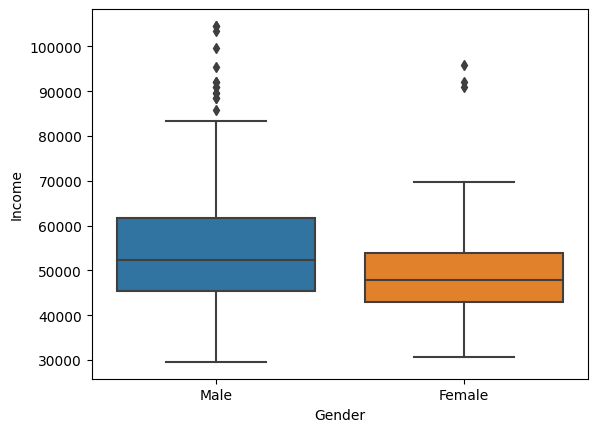

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df)
plt.show()

In [ ]:
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']

In [ ]:
# H0: mu1 = mu2
# H1: mu1>mu2
t_stat,p_val = ttest_ind(income_male,income_female,alternative="greater")
print(p_val)

0.003263631548607129
